# Schrödinger's equaiton


Schröginger's equation is an expression the state of a system, specifically the energy and posistion of an electron in time.

### iħ(ðΨ/dt) = -ħ^2/2m + VΨ

### Our first example is a simple square barrier

In this example the potential is 0 everywhere so the particle is free.  The square barrier is a symmetrical section where the potential is not 0 and not infinite, this area will reflect parts of the wave and trasmit parts as well.  

In [ ]:
import numpy as np

L = 20.0 #width of domain
N = 1024 #number of gridpoints

x = np.linspace(-L, L, N, endpoint=False)
dx = x[1] - x[0]

k = (2 * np.pi) * np.fft.fftfreq(N, d=dx) #Fourier wave numbers

In [ ]:
x0 = -5.0
sig = 0.5
k0 = 5.0
#Initializing the wavefunction

psi0 = np.exp(-(x - x0)**2 / (2 * sig**2)) * np.exp(1j * k0 * x)

In [11]:
V0 = 10.0
V = np.zeros_like(x) #Set potential equal to 0 everywhere(array)
V[(x > -1) & (x < 1)] = V0 #Set potential to equal 10 from -1 to 1



In [12]:
hbar = 1.0
m = 1.0
#I have these set to 1 for now to simplify the code.  Real values can be added later if necesary

T = (hbar**2 * k**2) / (2 * m)
#Kinetic energy, Fourier Space

expT = np.exp(-1j * T * (dx/2) / hbar)   # half step
expV = lambda dt: np.exp(-1j * V * dt / hbar)  # potential step

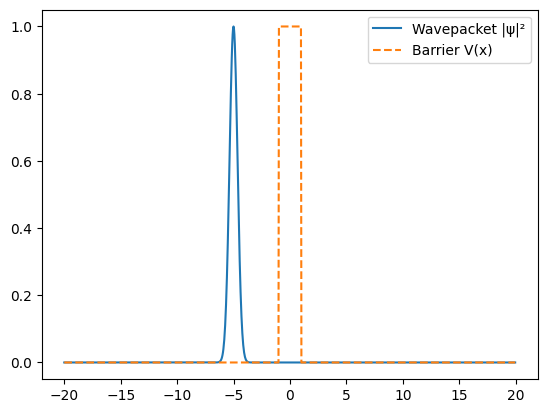

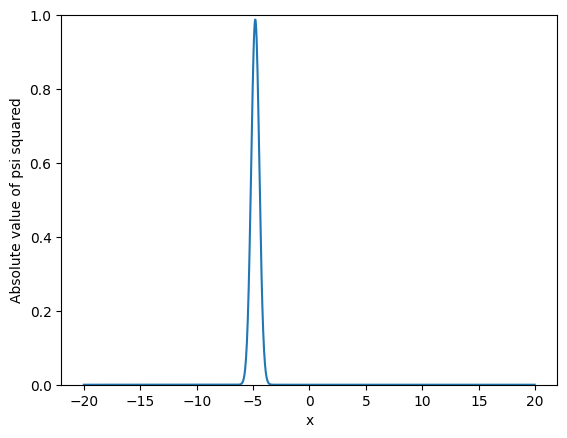

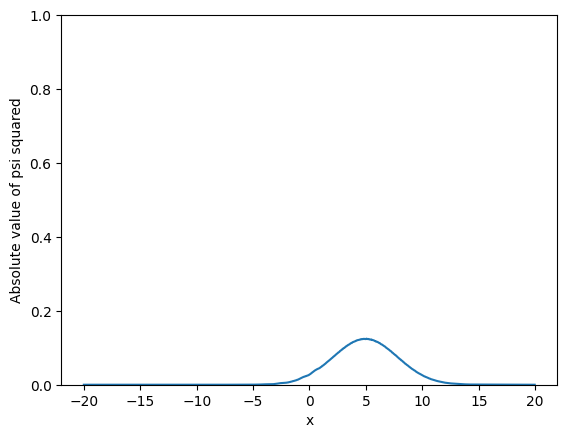

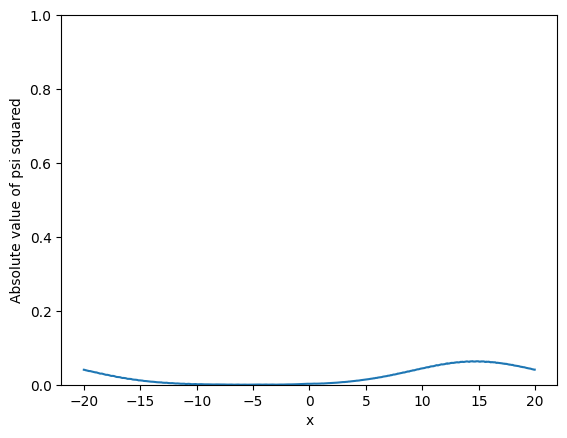

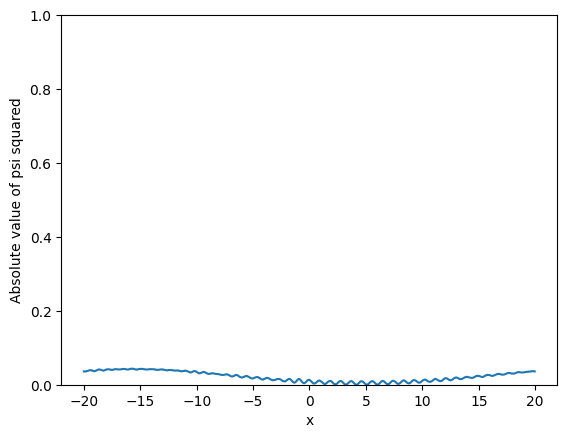

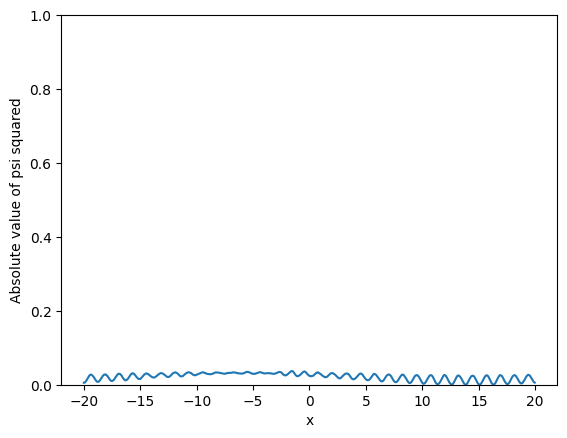

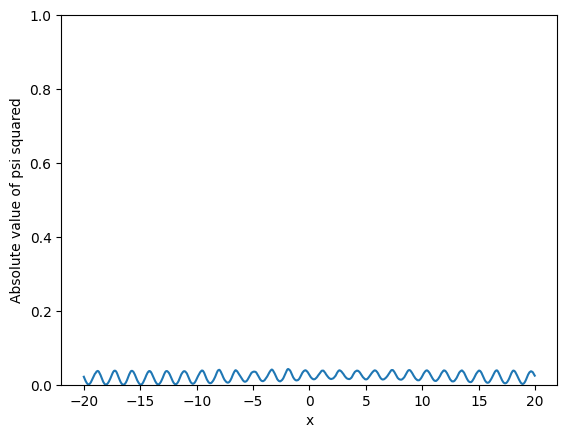

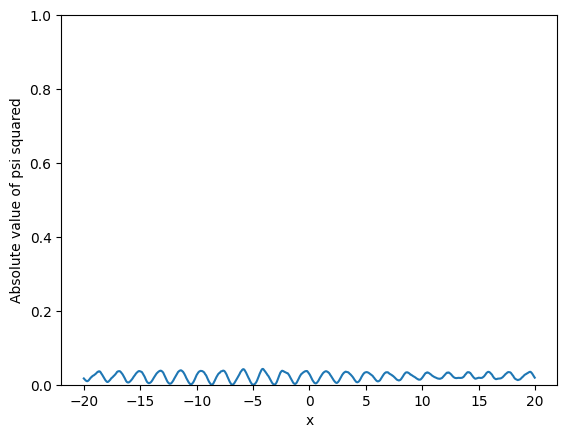

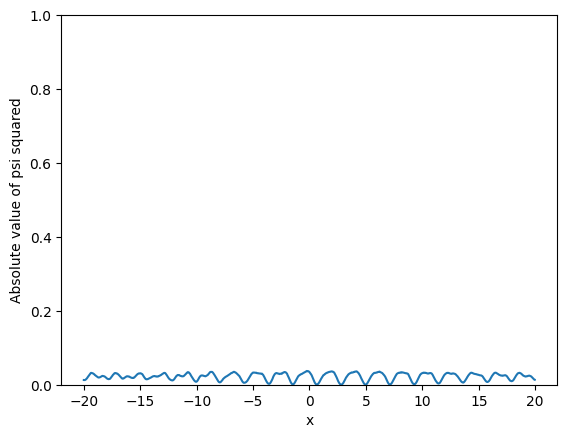

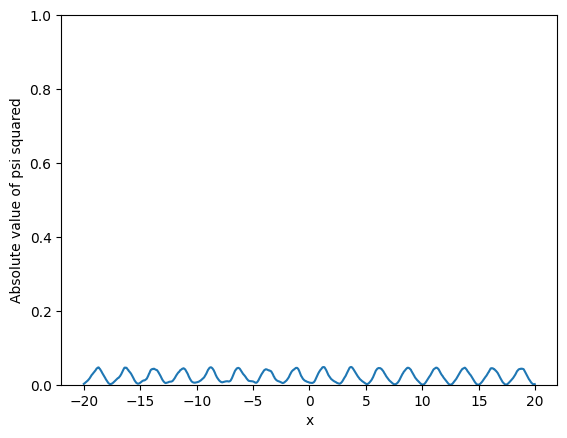

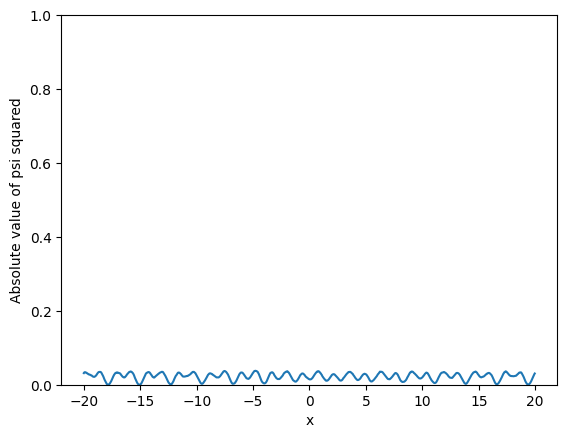

<Figure size 640x480 with 0 Axes>

In [14]:
from matplotlib import pyplot as plt

dt = 0.001
steps = 500

psi = psi0.copy()

plt.plot(x, np.abs(psi)**2, label="Wavepacket |ψ|²")
plt.plot(x, V / np.max(V) * np.max(np.abs(psi)**2), label="Barrier V(x)", linestyle="--")  # scaled barrier for visibility
plt.legend()
plt.show()


for i in range(steps):
    psi_hat = np.fft.fft(psi)
    psi_hat = expT * psi_hat
    psi = np.fft.ifft(psi_hat)

    psi = expV(dt) * psi

    psi_hat = np.fft.fft(psi)
    psi_hat = expT * psi_hat
    psi = np.fft.ifft(psi_hat)

    if i % 50 == 0:
        plt.xlabel("x"); plt.ylabel("Absolute value of psi squared")
        
        plt.plot(x, np.abs(psi)**2)
        plt.ylim(0, 1)
        plt.pause(0.01)
        plt.clf()
        

The first graph is simply a test to see if the potential and the barrier will interact as expected with this implementation(trasnmission and reflection)

The following graphs show the movement of the wave as it moves right and is partially reflected back to the left and partially transmitted to the right.  This is an example of quantum tunneling, a phenomenon where particles can pass through a barrier even with lower energy, this is due to the wave like properties of particles on the quantum level

### Square Barrier Contour
Continuing with the same example we displayed it as a contour map.  This also shows how  the wave interacts with the barrier (trasnmission and reflection).  You can clearly see some transmission as well as interaction in the barrier and at the top left you can see some wave like lines of reflection.

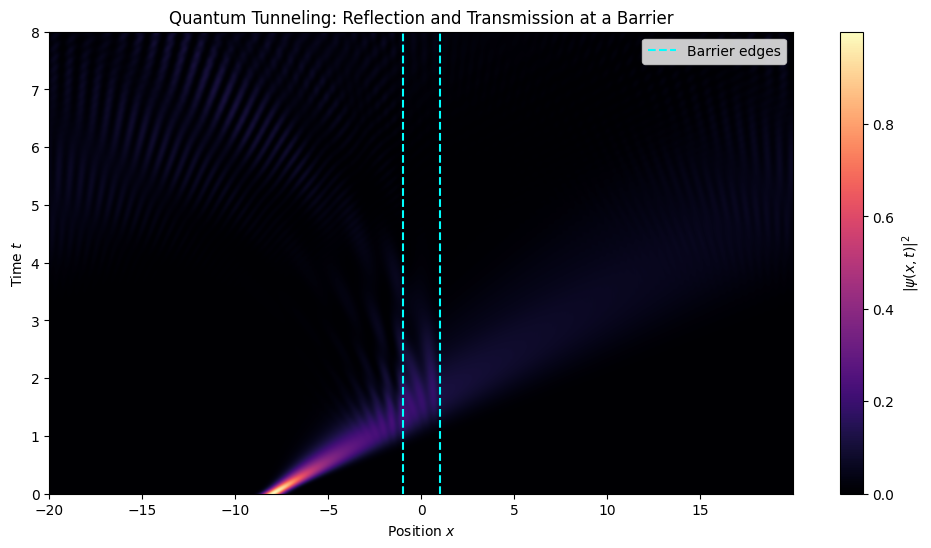

In [ ]:
# Grid setup
L = 20.0
N = 2048
x = np.linspace(-L, L, N, endpoint=False)
dx = x[1] - x[0]
k = (2 * np.pi) * np.fft.fftfreq(N, d=dx)

# Barrier potential setup
V0 = 5.0            # Barrier height
a, b = -1, 1        # Barrier from x=a to x=b
V = np.zeros_like(x)
V[(x > a) & (x < b)] = V0

# Initial wavepacket
x0 = -8.0           # Start far left
sigma = 0.5         # Moderate width
k0 = 5.0            # Initial momentum
psi = np.exp(-(x - x0)**2 / (2 * sigma**2)) * np.exp(1j * k0 * x)

# Time stepping
dt = 0.001
steps = 8000

# Evolution operators
T = 0.5 * k**2
expT = np.exp(-1j * T * dt / 2)
expV = np.exp(-1j * V * dt)

# Storage for |psi|^2 snapshots
snapshots = []

for i in range(steps):
    # Half-step kinetic evolution (Fourier space)
    psi_hat = np.fft.fft(psi)
    psi_hat = expT * psi_hat
    psi = np.fft.ifft(psi_hat)

    # Full-step potential evolution (real space)
    psi = expV * psi

    # Half-step kinetic evolution again
    psi_hat = np.fft.fft(psi)
    psi_hat = expT * psi_hat
    psi = np.fft.ifft(psi_hat)

    # Save every 10th frame
    if i % 10 == 0:
        snapshots.append(np.abs(psi)**2)

# Convert snapshots to array
snapshots = np.array(snapshots)
time_axis = np.linspace(0, dt * steps, len(snapshots))

# Plot contour
plt.figure(figsize=(12, 6))
extent = [x[0], x[-1], time_axis[0], time_axis[-1]]
plt.imshow(snapshots, extent=extent, aspect='auto', origin='lower', cmap='magma')
plt.colorbar(label=r'$|\psi(x,t)|^2$')
plt.xlabel('Position $x$')
plt.ylabel('Time $t$')
plt.title('Quantum Tunneling: Reflection and Transmission at a Barrier')

# Overlay barrier location 
plt.axvline(x=a, color='cyan', linestyle='--', label="Barrier edges")
plt.axvline(x=b, color='cyan', linestyle='--')
plt.legend()
plt.show()

## 2D Simple Harmonic Ocsillator

This example describes wavefunctions and quantized energy levels for systems or particles displaying harmonic motion


For the 2D SHO we need to solve
Hψ(x,y)=Eψ(x,y)

where H = −1/2∇^2+ 1/2(x^2 + y^2)

We should expect to see a circularly symmetric shape with no nodes and a peak at the origin (Should be similar to the Hydrogen atom 1s orbital)

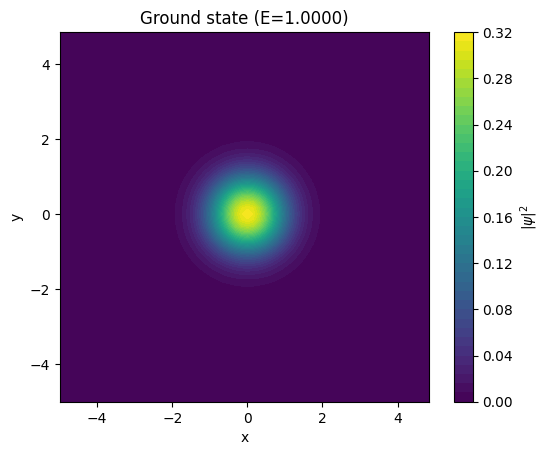

In [ ]:
from scipy.fftpack import fft2, ifft2, fftfreq
from scipy.sparse.linalg import eigsh, LinearOperator

# Grid parameters
N = 64  
L = 10.0
x = np.linspace(-L/2, L/2, N, endpoint=False)
dx = x[1] - x[0]
X, Y = np.meshgrid(x, x)

# Harmonic potential: V = 0.5 * (x^2 + y^2)
V = 0.5 * (X**2 + Y**2)

# Fourier wave numbers
kx = 2 * np.pi * fftfreq(N, d=dx)
ky = 2 * np.pi * fftfreq(N, d=dx)
KX, KY = np.meshgrid(kx, ky)
K2 = KX**2 + KY**2

# Spectral Laplacian
def laplacian(psi):
    return np.real(ifft2(-K2 * fft2(psi)))

# Define Hpsi as a LinearOperator
def Hpsi(flat_psi):
    psi = flat_psi.reshape(N, N)
    H_psi = -0.5 * laplacian(psi) + V * psi
    return H_psi.ravel()

H = LinearOperator((N*N, N*N), matvec=Hpsi)

# Solve for lowest few eigenstates
evals, evecs = eigsh(H, k=6, which='SA')  # 'SA' = smallest algebraic eigenvalues

# Normalize and reshape
orbitals = []
for i in range(6):
    psi = evecs[:, i].reshape(N, N)
    norm = np.sqrt((np.abs(psi)**2).sum() * dx * dx)
    orbitals.append(psi / norm)

# Plotting ground state 
plt.figure()
plt.contourf(X, Y, np.abs(orbitals[0])**2, levels=50, cmap='viridis')
plt.colorbar(label=r'$|\psi|^2$')
plt.title(f"Ground state (E={evals[0]:.4f})")
plt.xlabel('x'); plt.ylabel('y')
plt.gca().set_aspect('equal')
plt.show()

As expected we have a circle that has the greatest intensity at the origin and fades as r becomes greater

## Solving the 2D Hydrogen Atom with Spectral Methods

In the following section, we use spectral methods to solve the 2-dimensional Schrodinger's equation for a hydrogen atom, and visualize the s, px, and py orbitals. We use fast fourier transform to compute the Laplacian, and the eigsh function from scipy to numerically compute the first four lowest energy eigenvalue-eigenvector pairs for 

$$
H \psi \;=\; E \psi
$$

Finally, we plot $|\psi|^2$ as a colormap, which gives us the orbitals.

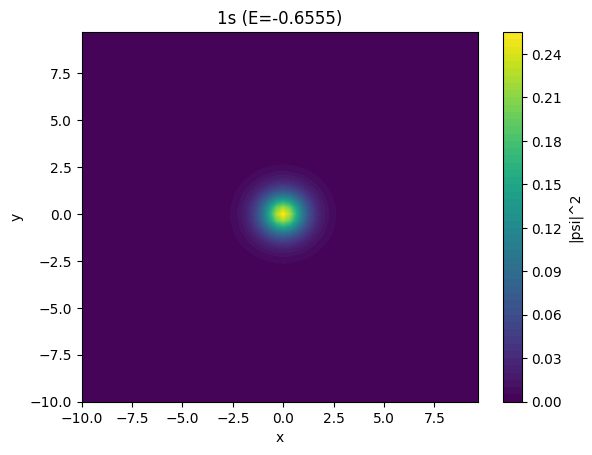

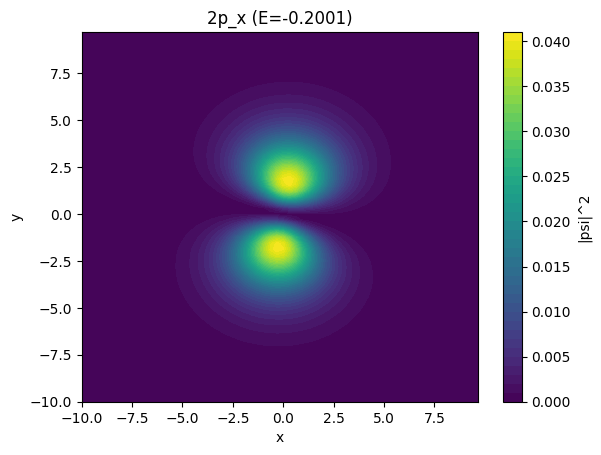

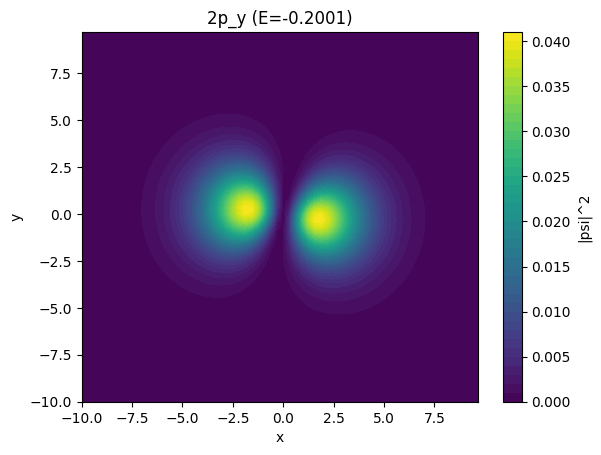

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, fftfreq
from scipy.sparse.linalg import eigsh, LinearOperator

# grid & potential
N = 64
L = 20.0
x = np.linspace(-L/2, L/2, N, endpoint=False)
dx = x[1] - x[0]
X, Y = np.meshgrid(x, x)
r = np.sqrt(X**2 + Y**2) + 1e-12 # adding tiny value to avoid singularity at r = 0
#V = -1.0 / r
epsilon = 0.5
V = -1.0 / np.sqrt(X**2 + Y**2 + epsilon**2)
# spectral laplacian
kx = fftfreq(N, d=dx) * 2*np.pi
ky = fftfreq(N, d=dx) * 2*np.pi
KX, KY = np.meshgrid(kx, ky)
K2 = KX**2 + KY**2

def lap(psi):
    return np.real(ifft2(-K2 * fft2(psi)))

def Hpsi(flat_psi):
    psi = flat_psi.reshape(N, N)
    return ( -0.5*lap(psi) + V*psi ).ravel()

H = LinearOperator((N*N, N*N), Hpsi)

evals, evecs = eigsh(H, k=4, sigma=-0.5) # finding E and psi for 1s, 2s, and the degenerate pair which gives 2px and 2py

# unpacking and normalizing orbitals
orbitals = []
for i in range(4):
    psi = evecs[:, i].reshape(N, N)
    norm = np.sqrt((np.abs(psi)**2).sum() * dx * dx)
    orbitals.append(psi / norm)

# plot 1s
s = orbitals[0]
plt.figure()
plt.contourf(X, Y, np.abs(s)**2, levels=50)
plt.title(f"1s (E={evals[0]:.4f})")
plt.xlabel("x"); plt.ylabel("y")
plt.colorbar(label="|psi|^2")
plt.show()

px, py = orbitals[1], orbitals[2]

for psi, label in [(px, "2p_x"), (py, "2p_y")]:
    plt.figure()
    plt.contourf(X, Y, np.abs(psi)**2, levels=50)
    plt.title(f"{label} (E={evals[1]:.4f})")
    plt.xlabel("x"); plt.ylabel("y")
    plt.colorbar(label="|psi|^2")
    plt.show()


## Note about 1s orbital

We had to change the potential from V = -1/r to a soft coulomb potential -1/sqrt(r^2 + epsilon^2) to account for the numerical error we originally had at the origin.  Our original program showed a node at (0,0) which we knew to be incorrect so we implemented this change to correct it and since epsilon is such a small value it doesn't alter our results